In [1]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2023-11-03 18:44:28.467044: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-03 18:44:28.469086: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 18:44:28.498218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 18:44:28.498244: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 18:44:28.498274: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
with h5py.File('SVHN_single_grey1.h5', 'r') as file:
    x_train = np.array(file['X_train'])
    y_train = np.array(file['y_train'])
    x_test = np.array(file['X_test'])
    y_test = np.array(file['y_test'])
    x_val = np.array(file['X_val'])
    y_val = np.array(file['y_val'])

In [3]:
x_train[0].shape

(32, 32)

In [4]:
y_train.shape

(42000,)

In [5]:
# Load and preprocess the SVHN dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Convert labels from {0,9} classes into one-hot encoded categorical vectors
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Constants
input_shape = x_train.shape[1:]
nClasses = 10

In [8]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10,  activation='softmax'))

    return model

In [9]:
# Create the model
svhn_model = createModel()

In [10]:
# Display the summary of the model
print("SVHN Model Architecture:")
svhn_model.summary()

SVHN Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (N

In [11]:
AdamOpt = Adam(learning_rate=0.001)
svhn_model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
batch_size = 256
epochs = 10

history = svhn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_val, y_val))

Epoch 1/10
71/71 [==============================] - 56s 794ms/step - loss: 2.3030 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
71/71 [==============================] - 58s 818ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
71/71 [==============================] - 57s 805ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
71/71 [==============================] - 56s 797ms/step - loss: 2.3026 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
71/71 [==============================] - 56s 796ms/step - loss: 2.3025 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
71/71 [==============================] - 57s 806ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
71/71 [==============================] - 67s 956ms/step - loss: 2.3025 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000

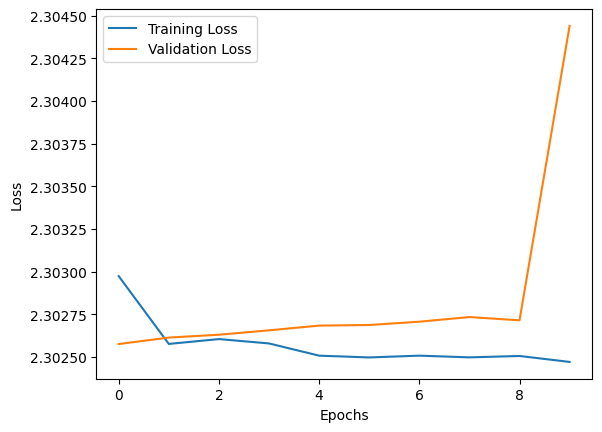

In [14]:
# Visualize training and validation errors
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Evaluate the model
test_loss, test_accuracy = svhn_model.evaluate(x_test, y_test)
print(f"\nSVHN Model - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

563/563 [==============================] - 5s 8ms/step - loss: 2.3024 - accuracy: 0.1018

SVHN Model - Test Loss: 2.3024370670318604, Test Accuracy: 0.10177777707576752


In [16]:
# Choose a few images for visualization
sample_images = x_test[:5]
sample_labels = y_test[:5]

In [17]:
# Visualize predictions
predictions = svhn_model.predict(sample_images)
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

1/1 [==============================] - 0s 101ms/step


In [18]:
# Display the actual and predicted labels
print("\nActual Labels:", sample_labels)
print("Predicted Labels:", predicted_labels)


Actual Labels: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Labels: [6, 6, 6, 6, 6]


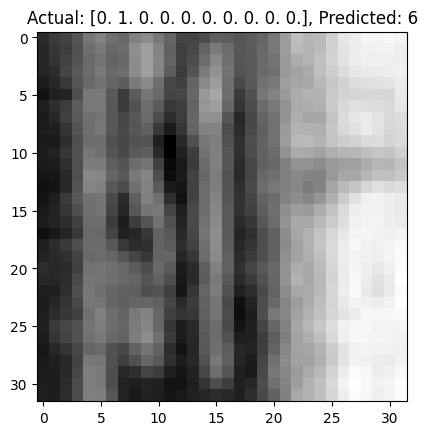

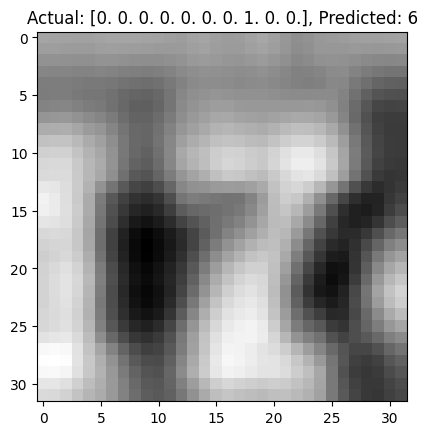

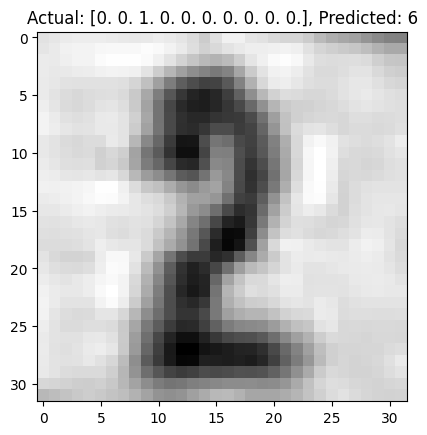

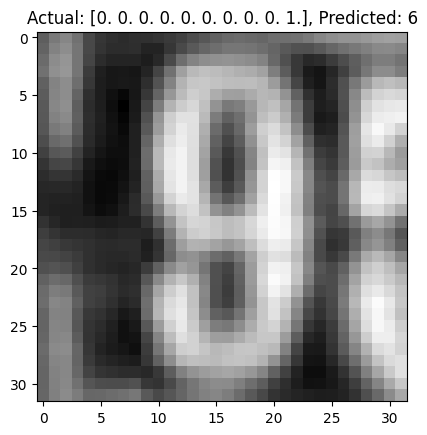

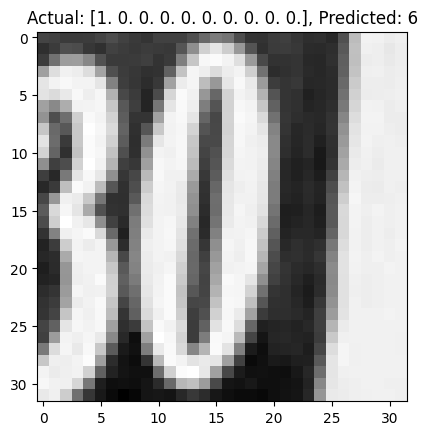

In [19]:
# Visualize sample images
for i in range(len(sample_images)):
    plt.figure()
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Actual: {sample_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.show()